# Лабораторная работа 4
---
### Упражнение 4.1

> На сайте Soft Murmur можно послушать множество природных источников шума, включая дождь, волны, ветер и др.   
>  Скачайте некоторые из этих файлов и вычислите спектры каждого сигнала. Похож ли спектр мощности на белый, розовый или броуносовский шум? Как спектр меняется во времени?

0.012645178752660725 White slope
-1.0171824889735923 Pink slope
-1.7982398103007864 Red slope


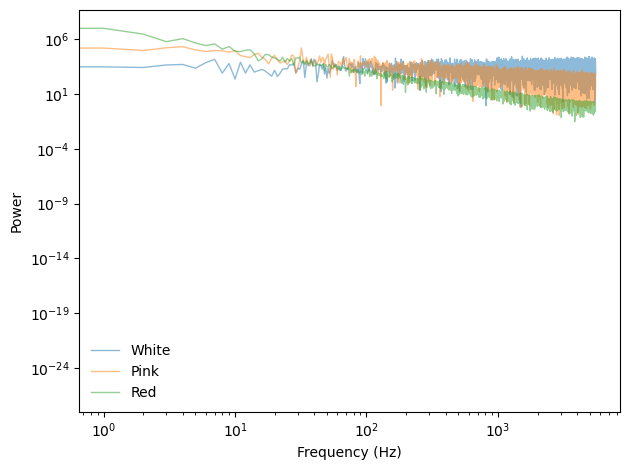

In [15]:
from thinkdsp import *

wind_wave = read_wave("wind.wav").segment(0, 1)
rain_wave = read_wave("rain.wav").segment(0, 1)

white_noise = UncorrelatedUniformNoise().make_wave(duration=1, framerate=11025)
pink_noise = PinkNoise().make_wave()
red_noise = BrownianNoise().make_wave()

white_spectrum = white_noise.make_spectrum()
white_spectrum.plot_power(linewidth=1, alpha=0.5, label="White")

pink_spectrum = pink_noise.make_spectrum()
pink_spectrum.plot_power(linewidth=1, alpha=0.5, label="Pink")

red_spectrum = red_noise.make_spectrum()
red_spectrum.plot_power(linewidth=1, alpha=0.5, label="Red")

loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog, legend=True)

print(white_spectrum.estimate_slope().slope, "White slope")
print(pink_spectrum.estimate_slope().slope, "Pink slope")
print(red_spectrum.estimate_slope().slope, "Red slope")

На графике выше приведены спектры и оценки наклона шумов.
Проведем сравнение с волнами дождя и ветра 

-2.397715197789457 Rain slope
0.012645178752660725 White slope
-1.0171824889735923 Pink slope
-1.7982398103007864 Red slope


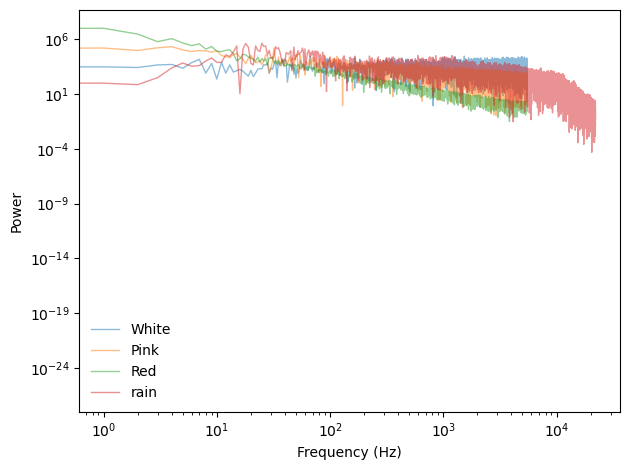

In [16]:
white_spectrum.plot_power(linewidth=1, alpha=0.5, label="White")
pink_spectrum.plot_power(linewidth=1, alpha=0.5, label="Pink")
red_spectrum.plot_power(linewidth=1, alpha=0.5, label="Red")

rain_spectrum = rain_wave.make_spectrum()
rain_spectrum.plot_power(linewidth=1, alpha=0.5, label="rain")

decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog, legend=True)

print(rain_spectrum.estimate_slope().slope, "Rain slope")
print(white_spectrum.estimate_slope().slope, "White slope")
print(pink_spectrum.estimate_slope().slope, "Pink slope")
print(red_spectrum.estimate_slope().slope, "Red slope")

Оценивая полученный график, можем заметить, что спектр дождя находится между спектрами белого и розового шумов, но имеет больше компонент частот и поэтому длиннее чем, сгенерированные шумы. И на конечном промежутке опускается в уровень красного шума.  
Был вычислен коэффициент наклона спектра функцией `estimate_slope()`. Значение наклона спектра дождя ближе к коэффициенту красного шума.  
Можем сделать вывод, что шум дождя соответствует красному шуму

-1.2274949304850857 Wind slope
0.012645178752660725 White slope
-1.0171824889735923 Pink slope
-1.7982398103007864 Red slope


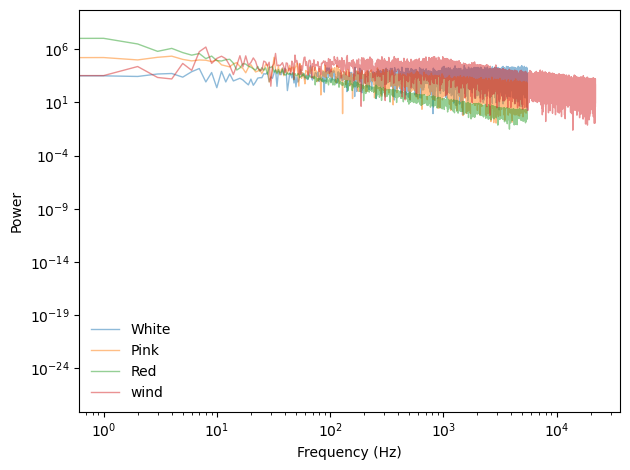

In [17]:
white_spectrum.plot_power(linewidth=1, alpha=0.5, label="White")
pink_spectrum.plot_power(linewidth=1, alpha=0.5, label="Pink")
red_spectrum.plot_power(linewidth=1, alpha=0.5, label="Red")

wind_spectrum = wind_wave.make_spectrum()
wind_spectrum.plot_power(linewidth=1, alpha=0.5, label="wind")

decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog, legend=True)

print(wind_spectrum.estimate_slope().slope, "Wind slope")
print(white_spectrum.estimate_slope().slope, "White slope")
print(pink_spectrum.estimate_slope().slope, "Pink slope")
print(red_spectrum.estimate_slope().slope, "Red slope")

На полученном графике видим резкое изменение в наклоне спектра записи ветра в частоте около $10^3$. По графику шум ветра больше похож на розовый шум.

Анализируя вычисленные значения наклона, подтверждаем, что шум ветра больше похож на розовый шум

### *Упражнение 4.2*

> В шумовом сигнале частотный состав меняется во времени. На большом интервале мощность на всех чатсотах одинакова, а на коротком мощности на каждой частоте случайна.  
> Для оценки долговременнрй средней мощности на каждой частоте можно разорвать сигнал на сегменты, вычислить спектр мощности для каждого сегмента, а зачем найти среднее по сегментам.  
> Реализуйте метод Барлетта и используйте его для оценки спектра мощности шумового сигнала

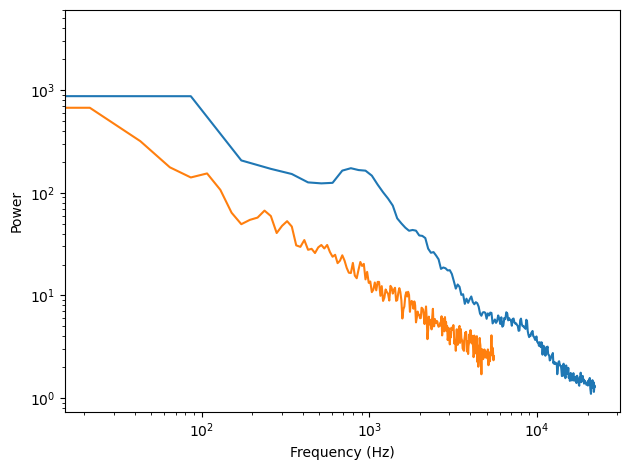

In [18]:
def bartlett_method(wave, seg_length=512, win_flag=True):

    spectro = wave.make_spectrogram(seg_length, win_flag)
    spectrums = spectro.spec_map.values()
    
    psds = [spectrum.power for spectrum in spectrums]
    
    hs = np.sqrt(sum(psds) / len(psds))
    fs = next(iter(spectrums)).fs

    spectrum = Spectrum(hs, fs, wave.framerate)
    return spectrum

psd = bartlett_method(wind_wave)
psd2 = bartlett_method(pink_noise)

psd.plot_power()
psd2.plot_power()

decorate(xlabel='Frequency (Hz)', 
         ylabel='Power', 
         **loglog)

### Упражнение 4.3

> Вычислите спектр цен BitCoin как функцию от времени. Похоже ли это на белый, розовый или броуносовский шум.
>
> В качестве данных используются поминутные данные с января 2012 по декабрь 2021.

In [19]:
import pandas as pd

df = pd.read_csv("filtered_price.csv")
ts = range(len(df["Timestamp"]))
ys = df["Weighted_Price"]

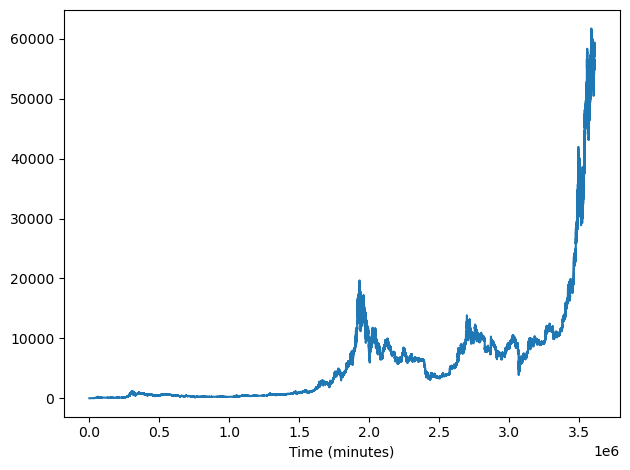

In [20]:
wave = Wave(ys, ts, framerate=1)
wave.plot()
decorate(xlabel='Time (minutes)')

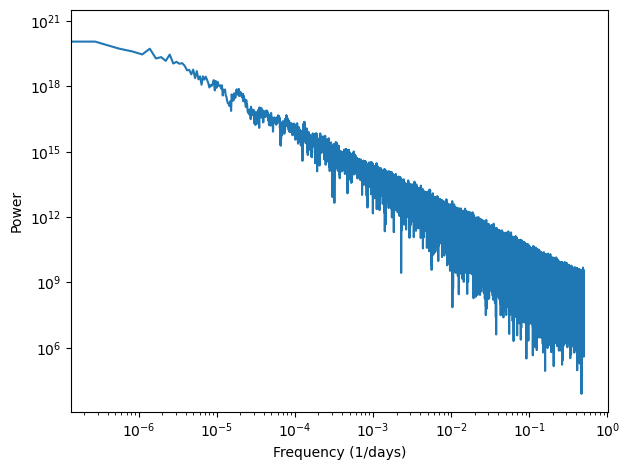

In [21]:
spectrum = wave.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency (1/days)',
         ylabel='Power', 
         **loglog)

In [22]:
spectrum.estimate_slope()[0]

-1.8056162277706684

Красный шум должен иметь наклон равный 2. Полученное значение - 1.8. Тип полученного шума - красный. Или розовый, близкий к красному

### Упражнение 4.4

> Напишите класс, называемый `UncorrelatedPoissonNoise`, наследующий `thinkdsp._Noise` и предоставляющий `evaluate`. Следует использовать `np.random.poisson` для генерации случайных величин из распределения Пуассона. Параметр этой функции `lam` - это среднее число частиц за время каждого интервала. Можно использовать атрибут `amp` для определения `lam`.

In [23]:
class UncorrelatedPoissonNoise(Noise):

    def evaluate(self, ts):
        ys = np.random.poisson(self.amp, len(ts))
        return ys


amp = 0.001
framerate = 10000
duration = 2

signal = UncorrelatedPoissonNoise(amp=amp)
wave = signal.make_wave(duration=duration, framerate=framerate)
wave.make_audio()

Получили звук, как будто у нас малый уровень радиации. Проверим полученное количество щелчков и то которое мы должны были получить.

20.0 19


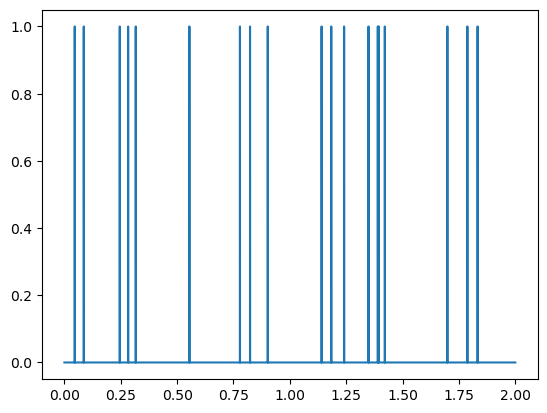

In [24]:
expected = amp * framerate * duration
actual = sum(wave.ys)
print(expected, actual)
wave.plot()
spectrum = wave.make_spectrum()

-0.0038733370234685497

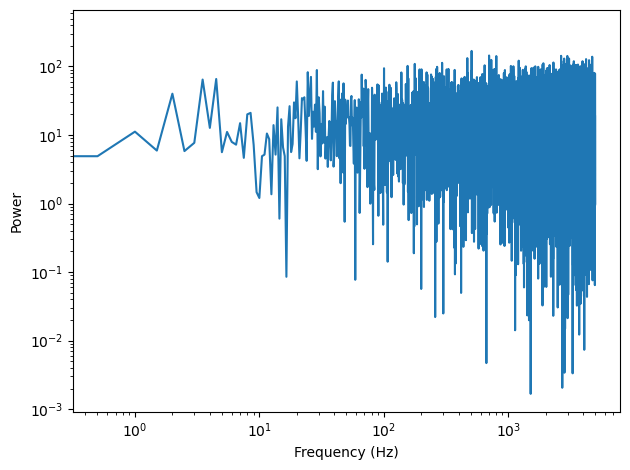

In [25]:
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

spectrum.estimate_slope().slope

Анализируя спектр и коэффициент наклона видим, что полученный шум очень близок в белому шуму.  
C увеличением `amp` сигнал начинает звучать как шум

In [26]:
amp = 1
framerate = 10000
duration = 1

signal = UncorrelatedPoissonNoise(amp=amp)
wave = signal.make_wave(duration=duration, framerate=framerate)
wave.make_audio()

### Упражнение 4.5

> В этой главе алгоритм для генерации розового шума концептуально простой, но затратный. Существуют более эффективные варианты, например алгоритм Voss-McCartney. Изучите этот способ, реализуйте его, вычислите спектр результата и убедитесь, что соотношение между мощностью и частотой соответствующие

Алгоритм Восса-МакКартни основан на суммировании нескольких распределенных случайных компонент

In [74]:

def voss(ts, ns):
    array = np.empty((ts, ns))
    array.fill(np.nan)
    array[:, 0] = np.random.random(ts)

    for i in range(ts):
        for j in range(1, ns):
            if (i % (2 ** j) == 0):
                array[i, j] = np.random.random()
    return array

res = voss(10000, 10)

df = pd.DataFrame(res)
filled = df.fillna(method='ffill', axis=0)


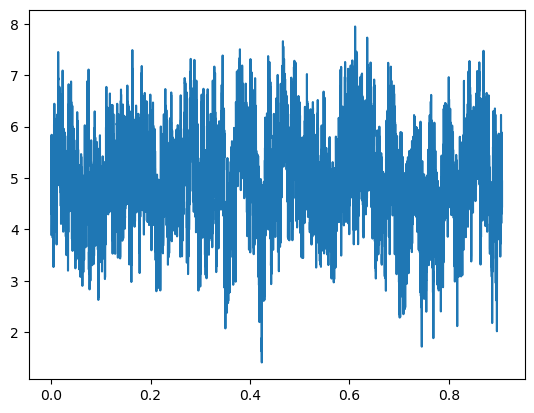

In [75]:
total = filled.sum(axis=1)
wave = Wave(total.values)
wave.plot()

-1.0393327539187684

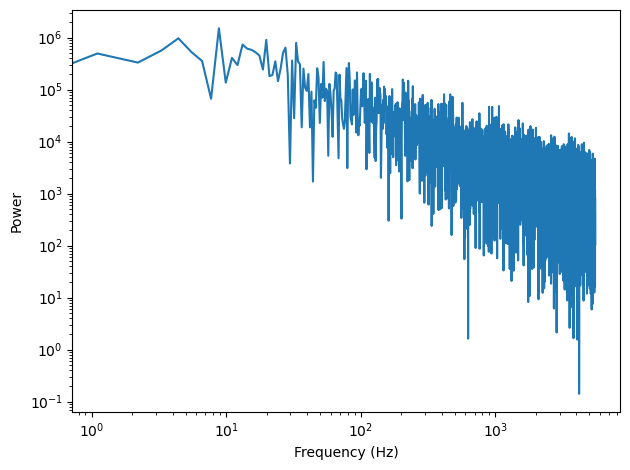

In [76]:
spectrum = wave.make_spectrum()
spectrum.hs[0] = 0
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

spectrum.estimate_slope()[0]

Сгенерированные сигналы имеют коэффициент близкий к 1, что говорит об успешной генерации розового шума